# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV

# Uploading the data

In [2]:
df=pd.read_csv('adult.csv')
actualdf=pd.read_csv('adult.csv')

In [3]:
df.shape

(32561, 15)

###### **There are 32561 observations and 15 dimensions in the data**

###### The dimensions in the data are:

        Age -                   age of the person in the survey
        Sex -                   gender of the individual
        Native Country -  origin og the individual
        Race -                  race of the individual
        Education -          Education of the individual 
        Education Num- Number of years of study of individual
        Workclass -         Class of the work of the individual
        Occupation -        Occupation of the individual
        Hours per week -  Number of hours an individual works in a week
        Marital Status -   Status of the individual 
        Relationship -      Relation of the individual in the family
        Capital Gain -    capital gain incurred by the individual
        Capital Loss -    capital loss incurred by the induvidual
        Fnlwgt -            number of people who are 16+
        Income -           two classes of income <=50K or >50K   ( target feature)

######       There are 14 dependent dimensions
###### 6 numerical dimensions and
        Age -                   continuous
        Capital Gain -      continuous
        Capital Loss -      countinous
        Fnlwgt -              continuous
        Educcation Num- discrete:  education levels
        Hours per week - discrete 
###### 8 categorical dimensions
        Sex -                   categorical: Female or Male
        Native Country -  categorical : US, Mexico etc
        Race -                  categorical : White,Black,Asian etc
        Education -          categorical: HS-grad, Doctorate,Bachelors etc
        Workclass -         categorical: Private,self employed etc
        Occupation -        categorical : Manegerial,Sales etc
        Marital Status -  categorical: Widowed,Seperated etc 
        Relationship -      categorical: husband,wife etc
###### target dimension
        Income -             categorical : >50K,<=50K

# Exploratory Data Analysis - EDA

 ### bivariate

C:\Users\harika kanthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harika kanthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


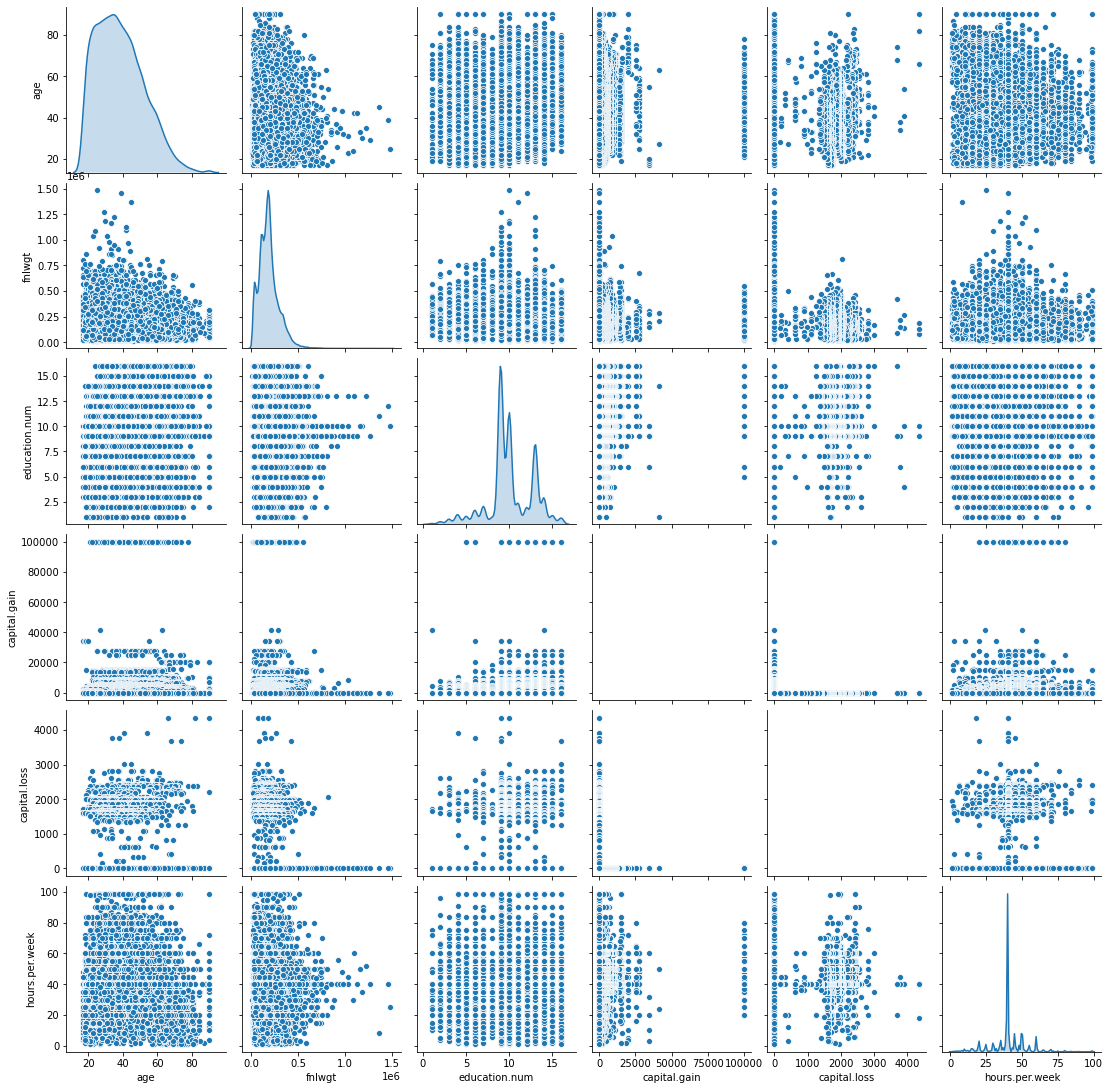

In [4]:
sns.pairplot(df,diag_kind='kde')

C:\Users\harika kanthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harika kanthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harika kanthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harika kanthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


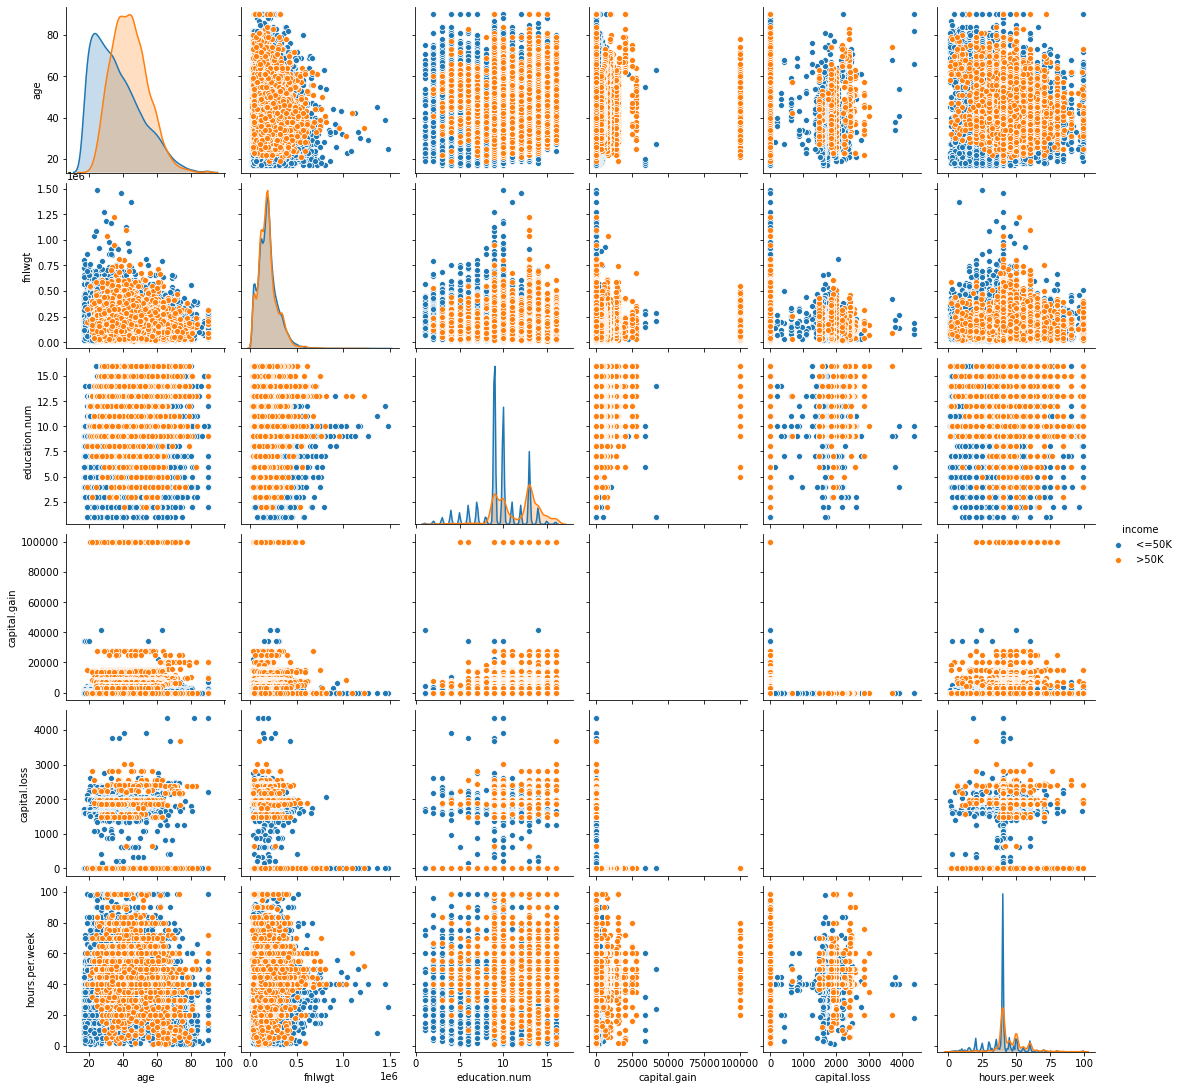

In [5]:
sns.pairplot(df,diag_kind='kde', hue="income")

### UNIVARIATE

##### Categorical dimensions

WORKCLASS
                  counts       perc
Private            22696  69.703019
Self-emp-not-inc    2541   7.803814
Local-gov           2093   6.427935
?                   1836   5.638647
State-gov           1298   3.986364
Self-emp-inc        1116   3.427413
Federal-gov          960   2.948312
Without-pay           14   0.042996
Never-worked           7   0.021498


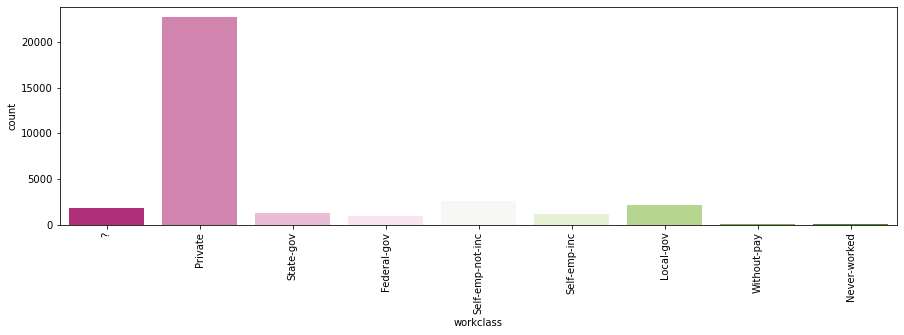

EDUCATION
              counts       perc
HS-grad        10501  32.250238
Some-college    7291  22.391818
Bachelors       5355  16.446055
Masters         1723   5.291607
Assoc-voc       1382   4.244341
11th            1175   3.608612
Assoc-acdm      1067   3.276926
10th             933   2.865391
7th-8th          646   1.983969
Prof-school      576   1.768987
9th              514   1.578576
12th             433   1.329812
Doctorate        413   1.268389
5th-6th          333   1.022696
1st-4th          168   0.515955
Preschool         51   0.156629


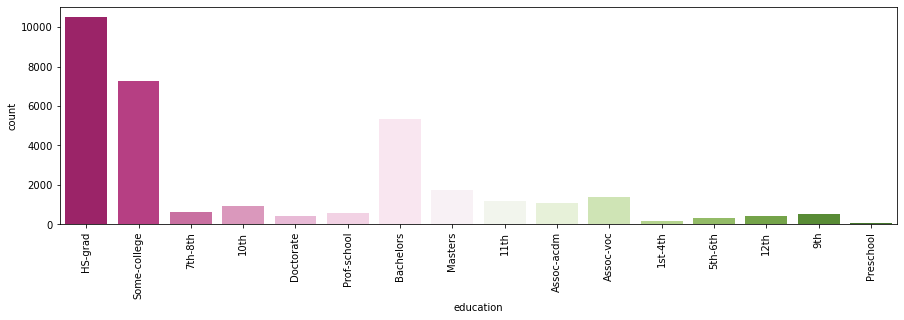

MARITAL.STATUS
                       counts       perc
Married-civ-spouse      14976  45.993673
Never-married           10683  32.809189
Divorced                 4443  13.645158
Separated                1025   3.147938
Widowed                   993   3.049661
Married-spouse-absent     418   1.283744
Married-AF-spouse          23   0.070637


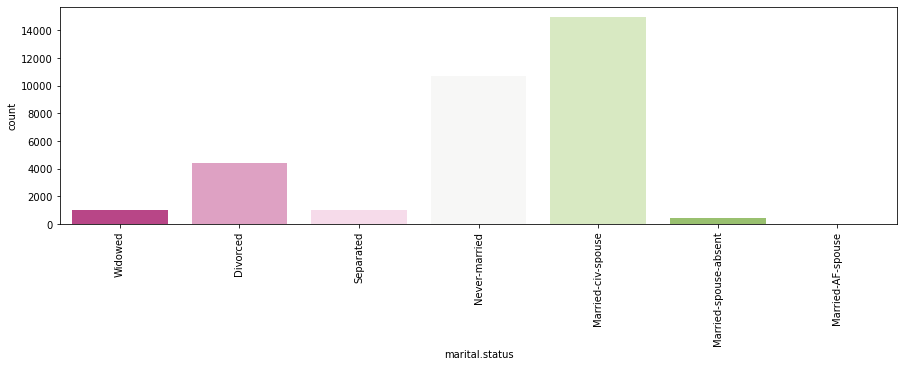

OCCUPATION
                   counts       perc
Prof-specialty       4140  12.714597
Craft-repair         4099  12.588680
Exec-managerial      4066  12.487331
Adm-clerical         3770  11.578268
Sales                3650  11.209729
Other-service        3295  10.119468
Machine-op-inspct    2002   6.148460
?                    1843   5.660146
Transport-moving     1597   4.904641
Handlers-cleaners    1370   4.207487
Farming-fishing       994   3.052732
Tech-support          928   2.850035
Protective-serv       649   1.993182
Priv-house-serv       149   0.457603
Armed-Forces            9   0.027640


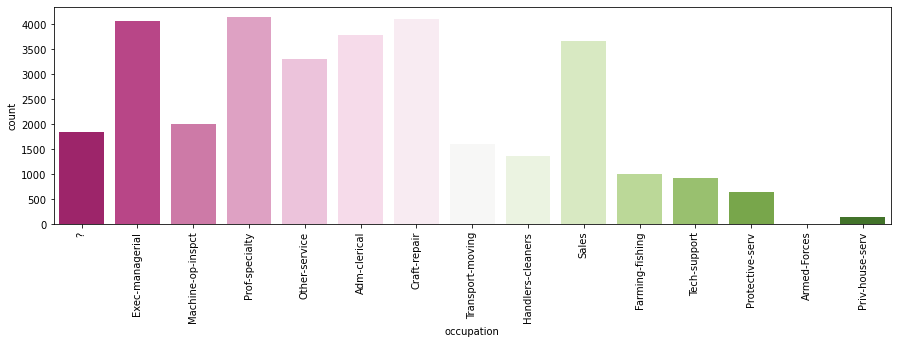

RELATIONSHIP
                counts       perc
Husband          13193  40.517797
Not-in-family     8305  25.505973
Own-child         5068  15.564633
Unmarried         3446  10.583213
Wife              1568   4.815577
Other-relative     981   3.012807


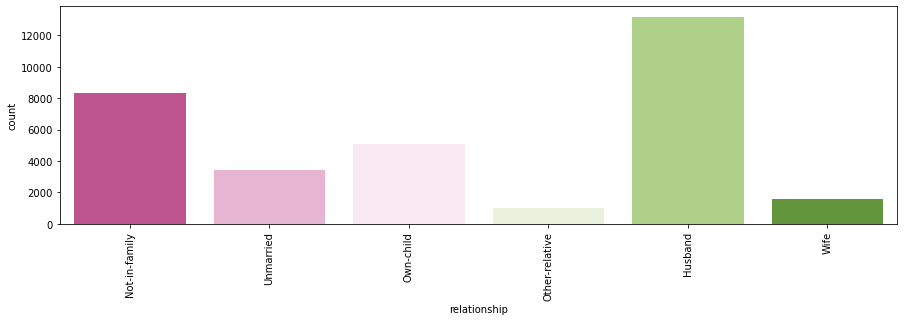

RACE
                    counts       perc
White                27816  85.427352
Black                 3124   9.594300
Asian-Pac-Islander    1039   3.190934
Amer-Indian-Eskimo     311   0.955130
Other                  271   0.832284


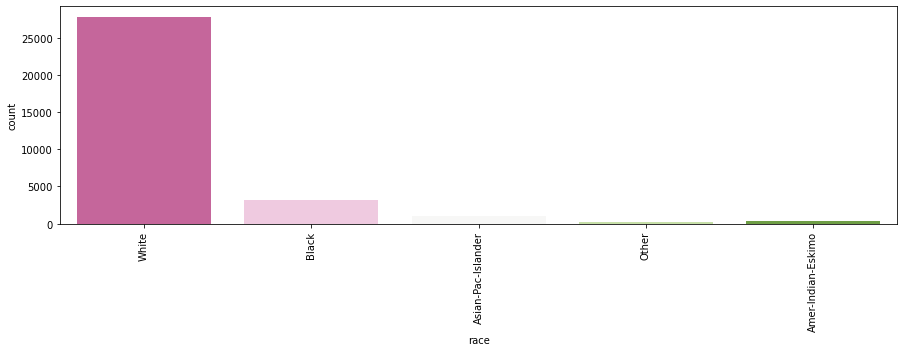

SEX
        counts       perc
Male     21790  66.920549
Female   10771  33.079451


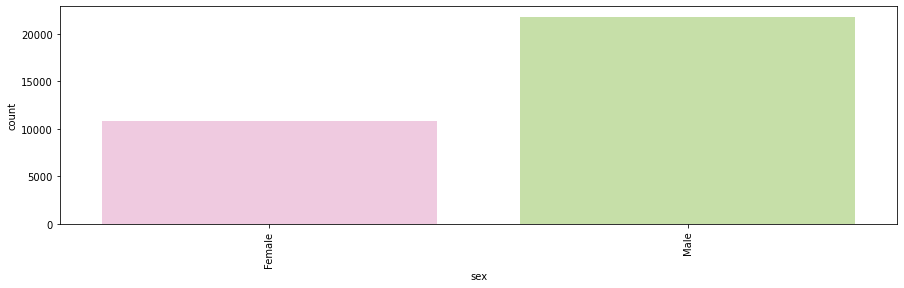

NATIVE.COUNTRY
                            counts       perc
United-States                29170  89.585701
Mexico                         643   1.974755
?                              583   1.790486
Philippines                    198   0.608089
Germany                        137   0.420749
Canada                         121   0.371610
Puerto-Rico                    114   0.350112
El-Salvador                    106   0.325543
India                          100   0.307116
Cuba                            95   0.291760
England                         90   0.276404
Jamaica                         81   0.248764
South                           80   0.245693
China                           75   0.230337
Italy                           73   0.224195
Dominican-Republic              70   0.214981
Vietnam                         67   0.205768
Guatemala                       64   0.196554
Japan                           62   0.190412
Poland                          60   0.184270
Columbia           

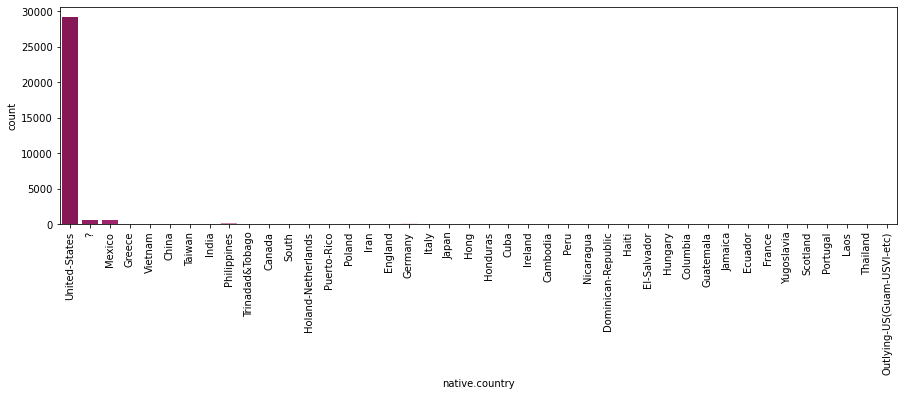

INCOME
       counts       perc
<=50K   24720  75.919044
>50K     7841  24.080956


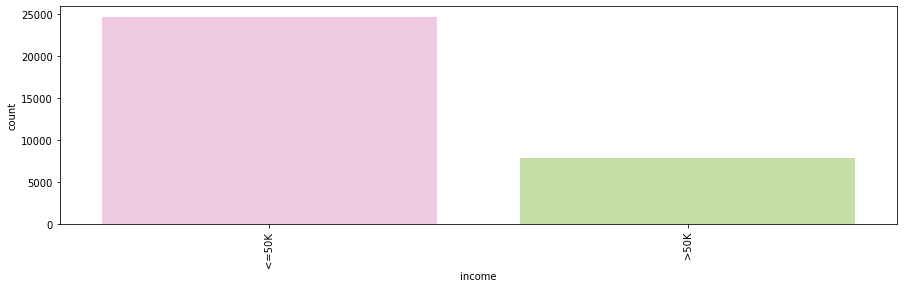

In [6]:
for i in df.select_dtypes(include="object"):
    # selecting all the categorical columns
    x=pd.DataFrame({"counts":df[i].value_counts(),"perc":df[i].value_counts(normalize=True)*100},index=df[i].value_counts().index)
    # creating a data frame with the value counts and their percentages
    print(i.upper())
    # printing the column name
    print(x)
    # printing the data frame
    plt.figure(figsize=(15,4))
    sns.countplot(df[i],palette="PiYG")
    # plotting a countplot since theya re categorical features
    plt.xticks(rotation=90)
    # setting ticks at 90 degrees for better view
    plt.show()

**Workclass**
1. Private occupies the highest percentage with 69.7%, and self employed with 7%
2. Other classes have low percentages with never worked being the lowest 

**Education**
1. Most people are high school graduates followed by some college while preschool is the lowest 
2. Doctrorate and prof school, the highest level also is low comparitively

**Marital Status**
1. Married with civilians occupy the highest and those to armed forces the lowest
2. Never married is the second indicating more people in the age below 40

**Occupation**
1.  Intellectual jobs seem to occupy the high percentages while manual the lowest

**Relationship**
1. Husbands work a lot more than anyone, Wife is second to lowest having only about 5%

**Race**
1. Since most of the data is from USA the whites tend towards the highest having 85% of the records
2. this is followed by blacks, asians, american indians and others

**Sex**
1. Males are about two thirds of the records and females are only one third

**Native country**
1. Unites States have the highest with 89.5% followed by Mexico with 1.9%

**Income**
1. 75% of the records belong to income class <=50K
2. 25% of the records belong to income class >50K

##### Numerical dimensions

AGE
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


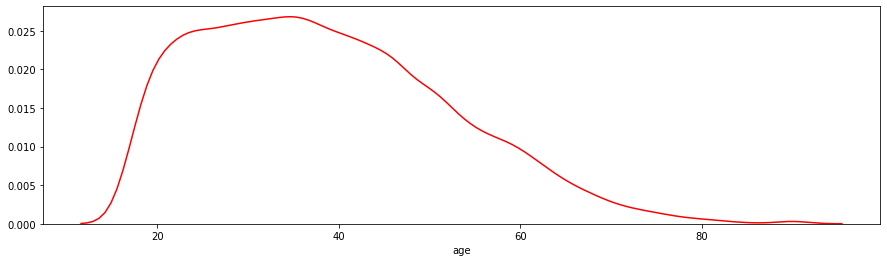

FNLWGT
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


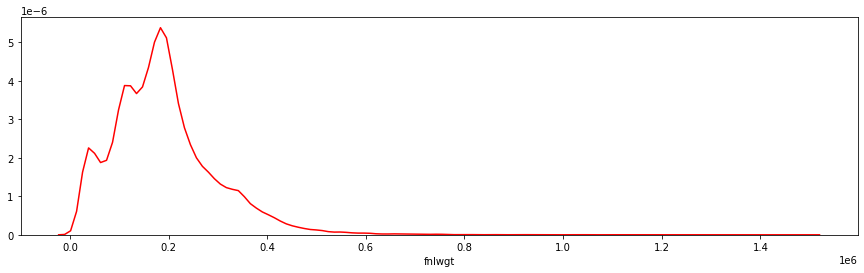

EDUCATION.NUM
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64


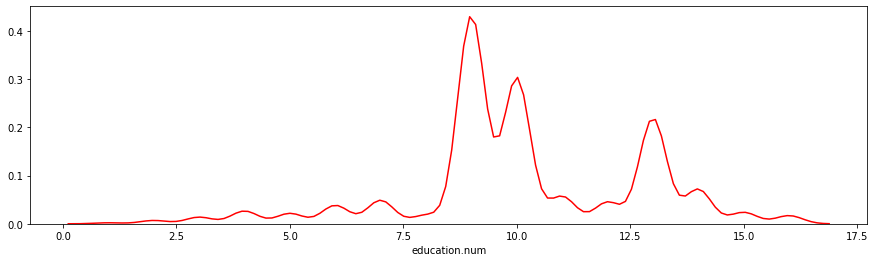

CAPITAL.GAIN
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64


C:\Users\harika kanthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


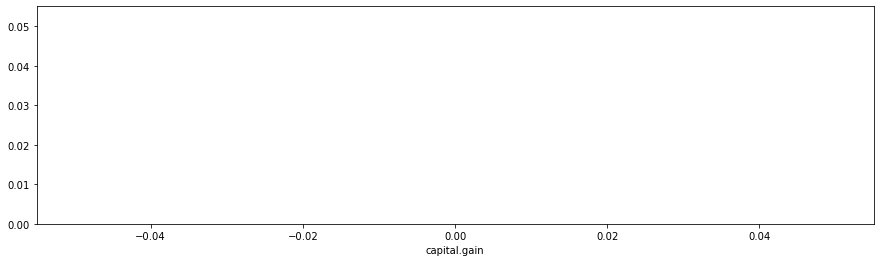

CAPITAL.LOSS
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64


C:\Users\harika kanthi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


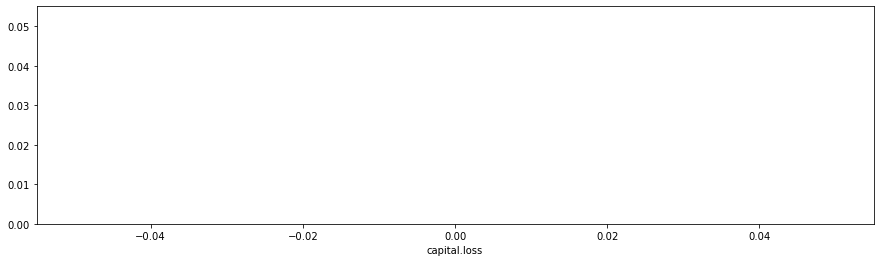

HOURS.PER.WEEK
count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64


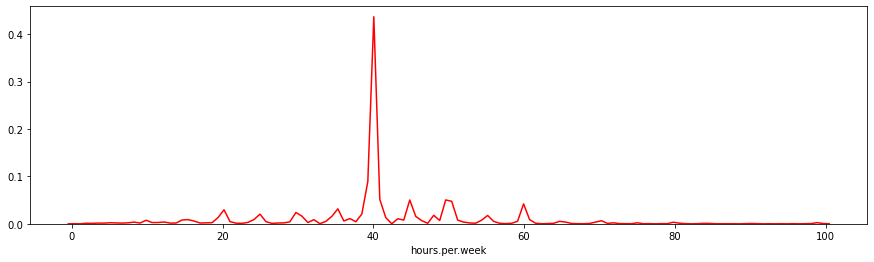

In [7]:
for i in df.select_dtypes(exclude="object"):
    # selecting all features which are numerical in nature
    print(i.upper())
    # printing the column name
    print(df[i].describe())
    # descriptive statistics of the feature
    plt.figure(figsize=(15,4))
    sns.distplot(df[i], hist=False,color="red")
    #distribution plot of the feature
    plt.show()

**Age**
1. The lowest age that was eligible for the census shows that it was 17 while the highest was 90 years
2. Age as we can see has a steady growth till 40 years and then it gradually drops
3. Most people who work are around ages 20-40
4. People below 20 and people above 80 were always in the income class <=50K

**capital gain**
1. Most people have capital gains 0
2. Of the people with capita gain few people have higher gains

**capital loss**
1. Very similar to capital gains

**Hours per week**
1. most people work from 20-60 hours of which again most of them work for 40 hours per week
2. People working more than 60 usually are self employed and manual based workclass 

# Data preparation

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


    The data has    ?    which are the missing values
    They have to be replaced with nan
    The data has null values that we need to clean and prepare for further

In [9]:
df.replace({'?':np.nan},inplace=True)
# replacing the ? with null values
actualdf.replace({'?':np.nan},inplace=True)

In [10]:
df.isnull().sum()[df.isnull().sum()>0]
# selecting the features and the null values where they are present

workclass         1836
occupation        1843
native.country     583
dtype: int64

In [11]:
df.isnull().sum()[df.isnull().sum()>0]*100/df.shape[0]
# calculating the percentage of null values in each feature

workclass         5.638647
occupation        5.660146
native.country    1.790486
dtype: float64

In [12]:
df[df.workclass.isnull()].occupation.unique()
# selecting the unique values in occupation feature whereever workclass is missing

array([nan], dtype=object)

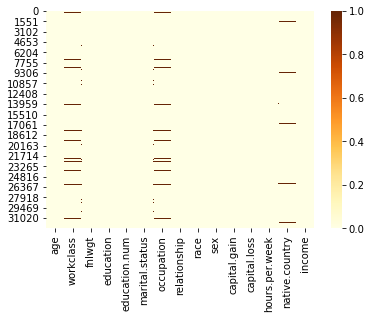

In [13]:
sns.heatmap(df.isnull(),cmap="YlOrBr")
# a heatmap of the null values

    The above code proves that whenever workclass is missing the occupation is also missing
    There is about    5-6% of missing values in the data

#### dealing with education and education number

In [14]:
for i in sorted(df['education.num'].unique()):
    # selecting the unique values in the education number feature
    a=df[df['education.num']==i].education.unique()
    # selecting the unique values in the education feature with that education number
    print(i,"   :  ",a)
    # printing the education number and the education values

1    :   ['Preschool']
2    :   ['1st-4th']
3    :   ['5th-6th']
4    :   ['7th-8th']
5    :   ['9th']
6    :   ['10th']
7    :   ['11th']
8    :   ['12th']
9    :   ['HS-grad']
10    :   ['Some-college']
11    :   ['Assoc-voc']
12    :   ['Assoc-acdm']
13    :   ['Bachelors']
14    :   ['Masters']
15    :   ['Prof-school']
16    :   ['Doctorate']


In [15]:
pd.DataFrame(df[df.income==">50K"]['education.num'].value_counts()*100/df['education.num'].value_counts())
# creating a dataframe with all observations of income class >50K
# selecting the education number
# calculating the value counts in each number
# calculating the percentage over the observations in class >50K over the total observations for each education number

,education.num
1,NaN
2,3.571429
3,4.804805
4,6.191950
5,5.252918
6,6.645230
7,5.106383
8,7.621247
9,15.950862
10,19.023454


    Education Number and education are the same
    Also we can see that as the educational level increases, the probability of being in income class >50K is also high
    Hence we are only considering education number for further analysis

In [16]:
df.drop('education',1,inplace=True)
# removing the feature permanently from the dataset

  #### dealing with wrong data points 

In [17]:
pd.crosstab(df.sex,df.relationship)
# the counts for the combinations of sex and relationship catgeories

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
sex,,,,,,
Female,1,3875,430,2245,2654,1566
Male,13192,4430,551,2823,792,2


    As we can see though the realtionship is husband they have been classified as female
    Similaly male have been put under wife

In [18]:
df[df.sex=="Female"][df.relationship=="Husband"]
# selecting obserations with sex as female and relationship as husband

C:\Users\harika kanthi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
10408,34,Private,175878,9,Married-civ-spouse,Sales,Husband,White,Female,0,0,40,United-States,<=50K


In [19]:
df[df.sex=="Male"][df.relationship=="Wife"]
# selecting obserations with sex as male and relationship as wife

C:\Users\harika kanthi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4733,29,Private,350162,13,Married-civ-spouse,Exec-managerial,Wife,White,Male,0,0,40,United-States,>50K
27851,36,Private,74791,13,Married-civ-spouse,Sales,Wife,White,Male,0,0,60,NaN,<=50K


In [20]:
df.loc[4733,'sex']='Female'
# replacing the value for male as female

In [21]:
df.loc[27851,'sex']='Female'
# replacing the value for male as female

In [22]:
df.loc[10408,'sex']='Male'
# replacing the value for female as male

# Dealing with null values

## Method 1: Dropping them

In [23]:
df_nadropped=df.dropna()
# removing all null values from the data and storing under a new dataset

In [24]:
df_nadropped.shape

(30162, 14)

In [25]:
df.shape[0]-df_nadropped.shape[0]

2399

In [26]:
(df.shape[0]-df_nadropped.shape[0])*100/df.shape[0]
# percentage of difference of total observations in actual data and the data with null values removed

7.36770983692147

In [27]:
df.isnull().sum()[df.isnull().sum()>0]*100/df.shape[0]

workclass         5.638647
occupation        5.660146
native.country    1.790486
dtype: float64

    There is about 7.36% of null values in the data
    They exist in workclass, occupation and native country
    Workclass and occupation are simultaneously missing with 5.6% each
    Native country has about 2% missing values

In [28]:
df_nadropped.income=df_nadropped.income.replace({'>50K':1,"<=50K":0})
df_nadropped.head(2)

C:\Users\harika kanthi\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


## Method 2 : Frequent value imputation

In [29]:
df_mode=df.copy()

In [30]:
df_mode.shape

(32561, 14)

In [31]:
df.workclass.value_counts()[:3]

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Name: workclass, dtype: int64

In [32]:
df_mode.workclass.fillna(value="Private",inplace=True)
# filling the value with the most frequent value in the workclass feature

In [33]:
df.occupation.value_counts()[:3]

Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Name: occupation, dtype: int64

In [34]:
df_mode.occupation.fillna(value="Prof-specialty",inplace=True)
# filling the value with the most frequent value in the occupation feature

In [35]:
df['native.country'].value_counts()[:3]

United-States    29170
Mexico             643
Philippines        198
Name: native.country, dtype: int64

In [36]:
df_mode['native.country'].fillna(value="United-States",inplace=True)
# filling the value with the most frequent value in the country feature

In [37]:
df_mode.income=df_mode.income.replace({'>50K':1,"<=50K":0})
df_mode.head(2)
# replacing the income feature values as 0 and 1

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0


## Method 3 : KNN Imputation

    Creating dictionaries based on weightages of the income class >50K

In [38]:
a=pd.DataFrame({"total": df['marital.status'].value_counts(),"income>50K": df[df.income==">50K"]['marital.status'].value_counts(),"perc_1":df[df.income==">50K"]['marital.status'].value_counts()*100/df['marital.status'].value_counts()}).sort_values("perc_1")
pd.concat ([ a, pd.Series(np.arange(1,8), index=a.index)] , axis=1)

,total,income>50K,perc_1,0
Never-married,10683,491,4.596087,1
Separated,1025,66,6.439024,2
Married-spouse-absent,418,34,8.133971,3
Widowed,993,85,8.559919,4
Divorced,4443,463,10.420887,5
Married-AF-spouse,23,10,43.478261,6
Married-civ-spouse,14976,6692,44.684829,7


In [39]:
# Steps:
# intialise number as 1
# create a new dictionary
# calculate the percentage of income class observations over total observations for each category
# create a data frame with percentages sorted in ascending order
# assign 1 for lowest percentage, 2 for next and so on.. for all categories


num=1
ms_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['marital.status'].value_counts()*100/df['marital.status'].value_counts()).sort_values('marital.status').index:
    ms_dict[i]=num
    num=num+1


num=1
occ_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['occupation'].value_counts()*100/df['occupation'].value_counts()).sort_values('occupation').index:
    occ_dict[i]=num
    num=num+1

num=1
race_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['race'].value_counts()*100/df['race'].value_counts()).sort_values('race').index:
    race_dict[i]=num
    num=num+1

num=1
rel_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['relationship'].value_counts()*100/df['relationship'].value_counts()).replace({np.nan:0}).sort_values('relationship').index:
    rel_dict[i]=num
    num=num+1

num=1
sex_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['sex'].value_counts()*100/df['sex'].value_counts()).replace({np.nan:0}).sort_values('sex').index:
    sex_dict[i]=num
    num=num+1

num=1
country_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['native.country'].value_counts()*100/df['native.country'].value_counts()).replace({np.nan:0}).sort_values('native.country').index:
    country_dict[i]=num
    num=num+1

num=1
wc_dict={}
for i in pd.DataFrame(df[df.income==">50K"]['workclass'].value_counts()*100/df['workclass'].value_counts()).replace({np.nan:0}).sort_values('workclass').index:
    wc_dict[i]=num
    num=num+1

    creating a reverse dictionary to retreive the categorical features from numerical to categorical

In [40]:
# steps:
# dictionary creating a above is reversed
# selecting every key value pair and assigning the key as value for value as key

rev_sex={}
for key, value in sex_dict.items():
    rev_sex[value]=key
    
    
rev_occ={}
for key, value in occ_dict.items():
    rev_occ[value]=key
    
    
rev_rel={}
for key, value in rel_dict.items():
    rev_rel[value]=key
    
    
rev_country={}
for key, value in country_dict.items():
    rev_country[value]=key
    
rev_race={}
for key, value in race_dict.items():
    rev_race[value]=key
    
    
rev_ms={}
for key, value in ms_dict.items():
    rev_ms[value]=key
    
    
rev_wc={}
for key, value in wc_dict.items():
    rev_wc[value]=key

In [41]:
sex_dict

{'Female': 1, 'Male': 2}

In [42]:
rev_sex

{1: 'Female', 2: 'Male'}

In [43]:
df_knn=df.copy()

In [44]:
df_knn.occupation=df_knn.occupation.map(occ_dict)
# mapping the occupation dictionary to convert to numerical

df_knn.workclass=df_knn.workclass.map(wc_dict)
# mapping the workclass dictionary to convert to numerical

df_knn.relationship=df_knn.relationship.map(rel_dict)
# mapping the relationship dictionary to convert to numerical

df_knn['native.country']=df_knn['native.country'].map(country_dict)
# mapping the country dictionary to convert to numerical

df_knn.race=df_knn.race.map(race_dict)
# mapping the race dictionary to convert to numerical

df_knn['marital.status']=df_knn['marital.status'].map(ms_dict)
# mapping the marital status dictionary to convert to numerical

df_knn.sex=df_knn.sex.map(sex_dict)
# mapping the sex dictionary to convert to numerical

df_knn.income=df_knn.income.replace({'>50K':1,"<=50K":0})
# converting the income classes into binomial classes

df_knn.head(2)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,9,4,NaN,4,4,1,0,4356,40,24.0,0
1,82,3.0,132870,9,4,14.0,4,4,1,0,4356,18,24.0,0


    Assuming 30 as n neighbors

In [45]:
df_knn=df_knn.drop('fnlwgt',1)
# removing the fnlwgt feature permanently

knn=KNNImputer(n_neighbors=30)
# selecting k neighbors as 30 for imputation

df_knn=pd.DataFrame(np.round(knn.fit_transform(df_knn)),columns=df_knn.columns)
# creating the dataframe by transformation caused by knn imputation and rounding them

df_knn_num=df_knn.copy()

In [46]:
df_knn.isnull().sum()[df_knn.isnull().sum()>0]

Series([], dtype: int64)

In [47]:
df_knn.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,4.0,9.0,4.0,10.0,4.0,4.0,1.0,0.0,4356.0,40.0,24.0,0.0
1,82.0,3.0,9.0,4.0,14.0,4.0,4.0,1.0,0.0,4356.0,18.0,24.0,0.0
2,66.0,3.0,10.0,4.0,10.0,3.0,3.0,1.0,0.0,4356.0,40.0,24.0,0.0
3,54.0,3.0,4.0,5.0,6.0,3.0,4.0,1.0,0.0,3900.0,40.0,24.0,0.0
4,41.0,3.0,10.0,2.0,13.0,1.0,4.0,1.0,0.0,3900.0,40.0,24.0,0.0


    Workclass imputed values

In [48]:
pd.DataFrame(df_knn[actualdf.workclass.isnull()==True].workclass.value_counts().values,
             index=df_knn[actualdf.workclass.isnull()==True].workclass.value_counts().index.map(rev_wc))

# selecting observations in actual data where workclass is null
# selecting these observations in the knn imputed dataset
# selecting value counts on such observations 
# mapping the index values which are numercial with the reverse  workclass dictionary created

,0
State-gov,930
Private,816
Self-emp-not-inc,89
Local-gov,1


    occupation imputed values

In [49]:
pd.DataFrame(df_knn[actualdf.occupation.isnull()==True].occupation.value_counts().values,
             index=df_knn[actualdf.occupation.isnull()==True].occupation.value_counts().index.map(rev_occ))

# selecting observations in actual data where occupation is null
# selecting these observations in the knn imputed dataset
# selecting value counts on such observations 
# mapping the index values which are numercial with the reverse  occupation dictionary created

,0
Adm-clerical,471
Transport-moving,419
Machine-op-inspct,325
Craft-repair,250
Sales,131
Farming-fishing,98
Tech-support,89
Protective-serv,45
Prof-specialty,8
Armed-Forces,7


    Country imputed values

In [50]:
pd.DataFrame(df_knn[actualdf['native.country'].isnull()==True]['native.country'].value_counts().values,
             index=df_knn[actualdf['native.country'].isnull()==True]['native.country'].value_counts().index.map(rev_country))


# selecting observations in actual data where country is null
# selecting these observations in the knn imputed dataset
# selecting value counts on such observations 
# mapping the index values which are numercial with the reverse  country dictionary created

,0
United-States,316
Hungary,121
Scotland,79
Ireland,32
Poland,12
Thailand,5
Cuba,5
Ecuador,3
Laos,2
South,2


    Reversing categorical data

In [51]:
df_knn.workclass=df_knn.workclass.map(rev_wc)
# mapping the reverse workclass  dictionary to convert back to categorical

df_knn.occupation=df_knn.occupation.map(rev_occ)
# mapping the reverse occupation  dictionary to convert back to categorical

df_knn.relationship=df_knn.relationship.map(rev_rel)
# mapping the reverse relationship  dictionary to convert back to categorical

df_knn.race=df_knn.race.map(rev_race)
# mapping the reverse race  dictionary to convert back to categorical

df_knn.sex=df_knn.sex.map(rev_sex)
# mapping the reverse sex  dictionary to convert back to categorical

df_knn['native.country']=df_knn['native.country'].map(rev_country)
# mapping the reverse country  dictionary to convert back to categorical

df_knn['marital.status']=df_knn['marital.status'].map(rev_ms)
# mapping the reverse marital status  dictionary to convert back to categorical

df_knn.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90.0,State-gov,9.0,Widowed,Sales,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0.0
1,82.0,Private,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0.0
2,66.0,Private,10.0,Widowed,Sales,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0.0
3,54.0,Private,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0.0
4,41.0,Private,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0.0


## Method 4 :  Only US data

In [52]:
df_us=df[df['native.country']=='United-States'].dropna()
# selecting observations with country as US
# dropping the null values in that dataset

df_us.income=df_us.income.replace({'>50K':1,"<=50K":0})
# mapping the income fetaure categories with 0 and 1

In [53]:
df_us.shape

(27504, 14)

In [54]:
df_us.drop(['native.country','fnlwgt'],1,inplace=True)

because all the data belongs to one country, the native country dimension is not necessary hence not considering

# Statistical testing

In [55]:
num=df_nadropped.select_dtypes(exclude='object')
# selecting all the numerical features in the data

cat=pd.concat([df_nadropped.select_dtypes(include='object'),df_nadropped.income],1)
# seecting all categorical features
# concatenating the income catgegory as well


#### Statistical testing for Numerical variables

using **one way anova** because income is categorical in nature and the other features are continuous in nature
      
we can also use **ttest_ind** in case of binary class categorical feature and continuous feature

In [56]:
dimensions=[]
# creating a new list to capture the feature names

test_stat=[]
# creating a new list to capture the feature test statistic

p_values=[]
# creating a new list to capture the feature test p values

explain=[]
# creating a new list to capture the yes or no based on p values

In [57]:
for i in num.columns[:-1]:
    # selecting the numerical features except the income class
    
    print(i.upper())
    # printing the column name
    
    dimensions.append(i)
    # appending the column name to the list
    
    A=df_nadropped[df_nadropped.income==1][i]
    # selecting the column from data with income class 1
    
    B=df_nadropped[df_nadropped.income==0][i]
    # selecting the column from data with income class 0
    
    print("Null Hypothesis: There is no significant statistical difference between two income groups for the feature ",i)
    # formulating the null hypothesis
    
    print("Alternate Hypothesis: There is a significant statistical difference between two income groupsfor the feature ",i)
    # formulating the alternate hypothesis
    
    print(" ")
    print("H0:_ mean ",i," of income class <= 50K    =  mean ",i, " of income class >50K")
    # formulating the mathematical equation for null hypothesis
    
    print("HA:_ mean ",i," of income class <= 50K    !=  mean ",i, " of income class >50K")
    # formulating the mathematical equation for alternate  hypothesis
    print(" ")
    mean_A=np.mean(A)
    # calculating the mean of the feature with income class 0
    
    mean_B=np.mean(B)
    # calculating the mean of the feature with income class 1
    
    print("  ")
    print("Mean ",i, " of income class >50K is:_ ",np.mean(A))
    print("Mean ",i, " of income class <=50K is:_ ",np.mean(B))
    # printing the means calculated
    
    if mean_A<mean_B:
        print("Mean ",i, " of income class >50K is higher than income class <=50K")
    else:
        print("Mean ",i, " of income class <=50K is higher than income class >50K")
    print("  ")
    
    print(stats.f_oneway(A,B))
    # printing the test statistics for the groups
    
    test_stat.append(stats.f_oneway(A,B).statistic)
    p_values.append(stats.f_oneway(A,B).pvalue)
    # appending the test statistic and the p values to the respective lists
    
    if stats.f_oneway(A,B).pvalue<=0.05:
        print("pvalue <= 0.05 reject null hypothesis")
        print("Since p value is less than 0.05, we reject the null hypothesis")
        print(" ")
        print("There is a significant statistical difference between the two oncome groups for the feature ",i)
        print("The feature ",i," is able to explain the variability of the target dimension")
        print("  ")
        explain.append("yes")
    else:
        print("pvalue > 0.05 fail to reject null hypothesis")
        print("Since p value is greater than 0.05, we fail to reject the null hypothesis")
        print("  ")
        print("There is NO significant statistical difference between the two oncome groups for the feature ",i)
        print("The feature ",i," is UNABLE to explain the variability of the target dimension")
        explain.append("NO")
        
    # comparing the test statstics and the p values and concluding the hypothesis testing
    
    print("  ")
    print("  ")

AGE
Null Hypothesis: There is no significant statistical difference between two income groups for the feature  age
Alternate Hypothesis: There is a significant statistical difference between two income groupsfor the feature  age
 
H0:_ mean  age  of income class <= 50K    =  mean  age  of income class >50K
HA:_ mean  age  of income class <= 50K    !=  mean  age  of income class >50K
 
  
Mean  age  of income class >50K is:_  43.95911028236548
Mean  age  of income class <=50K is:_  36.60806038668668
Mean  age  of income class <=50K is higher than income class >50K
  
F_onewayResult(statistic=1876.1353315627853, pvalue=0.0)
pvalue <= 0.05 reject null hypothesis
Since p value is less than 0.05, we reject the null hypothesis
 
There is a significant statistical difference between the two oncome groups for the feature  age
The feature  age  is able to explain the variability of the target dimension
  
  
  
FNLWGT
Null Hypothesis: There is no significant statistical difference between two i

#### Statistical testing for Categorical variables

using **chi square** because we have both categorical features 

In [58]:
for i in cat.columns[:-1]:
    # selecting the numerical features except the income class
    
    print(i.upper())
    # printing the column name
    
    dimensions.append(i)
    # appending the column name to the list
    
    print("Null Hypothesis: There is no significant difference between two income groups for the feature ",i)
    # formulating the null hypothesis
    
    print("Alternate Hypothesis: There is a significant difference between two income groupsfor the feature ",i)
    # formulating the alternate hypothesis
    print("  ")
    
    chi,p,a,b=stats.chi2_contingency(pd.crosstab(df_nadropped.income,df_nadropped[i]))
    # storinh the test statistic values in indentifiers
    
    test_stat.append(chi)
    p_values.append(p)
    # appending the test statistic and the p values to the respective lists
    
    print("statistic",chi)
    print("pvalue",p)
    print("  ")
    
    if p<=0.05:
        print("pvalue <= 0.05 reject null hypothesis")
        print("Since p value is less than 0.05, we reject the null hypothesis")
        print("  ")
        print("There is a significant statistical difference between the two oncome groups for the feature ",i)
        print("The feature ",i," is able to explain the variability of the target dimension")
        explain.append("yes")
    else:
        print("pvalue > 0.05 fail to reject null hypothesis")
        print("Since p value is greater than 0.05, we fail to reject the null hypothesis")
        print("  ")
        print("There is NO significant statistical difference between the two oncome groups for the feature ",i)
        print("The feature ",i," is UNABLE to explain the variability of the target dimension")
        explain.append("NO")
    # comparing the test statstics and the p values and concluding the hypothesis testing
        
        print("  ")
    print("\n\n")

WORKCLASS
Null Hypothesis: There is no significant difference between two income groups for the feature  workclass
Alternate Hypothesis: There is a significant difference between two income groupsfor the feature  workclass
  
statistic 804.1575273043354
pvalue 1.946095589239045e-170
  
pvalue <= 0.05 reject null hypothesis
Since p value is less than 0.05, we reject the null hypothesis
  
There is a significant statistical difference between the two oncome groups for the feature  workclass
The feature  workclass  is able to explain the variability of the target dimension



MARITAL.STATUS
Null Hypothesis: There is no significant difference between two income groups for the feature  marital.status
Alternate Hypothesis: There is a significant difference between two income groupsfor the feature  marital.status
  
statistic 6061.747962669037
pvalue 0.0
  
pvalue <= 0.05 reject null hypothesis
Since p value is less than 0.05, we reject the null hypothesis
  
There is a significant statistica

In [59]:
pd.DataFrame({"statistics":test_stat,"p value":p_values, "Explains":explain},index=dimensions).sort_values("p value")
# creating the dataframe with lists created before

,statistics,p value,Explains
age,1876.135332,0.000000e+00,yes
education.num,3819.914386,0.000000e+00,yes
capital.gain,1551.576577,0.000000e+00,yes
hours.per.week,1676.548626,0.000000e+00,yes
marital.status,6061.747963,0.000000e+00,yes
occupation,3687.620651,0.000000e+00,yes
relationship,6233.840454,0.000000e+00,yes
sex,1413.146829,2.921492e-309,yes
workclass,804.157527,1.946096e-170,yes
capital.loss,694.724841,2.182812e-151,yes


    Only Fnlwgt was unable to expalin statistically the variability in the income class
    hence we further exclude it in our data

In [60]:
df_nadropped.drop('fnlwgt',1,inplace=True)
df_mode.drop('fnlwgt',1,inplace=True)
# removing the feature permanently

C:\Users\harika kanthi\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Correlation

In [61]:
df_knn.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.036527,0.077674,0.057775,0.068756,0.234037
education.num,0.036527,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,0.335154,0.223329,0.150526,0.229689,1.000000


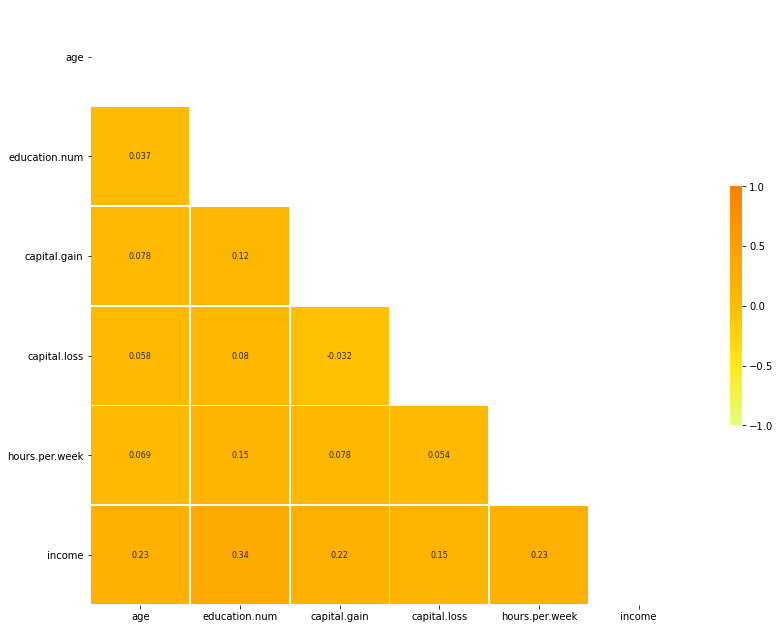

In [62]:
corr_matrix = df_knn.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 11)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8},
                      cmap="Wistia")
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()

In [63]:
correlations=pd.DataFrame(df_knn.corr()).replace({1:np.nan})

In [64]:
np.min(correlations)

age               0.036527
education.num     0.036527
capital.gain     -0.031615
capital.loss     -0.031615
hours.per.week    0.054256
income            0.150526
dtype: float64

In [65]:
np.min(np.min(correlations))

-0.03161506295218898

In [66]:
np.max(correlations)

age               0.234037
education.num     0.335154
capital.gain      0.223329
capital.loss      0.150526
hours.per.week    0.229689
income            0.335154
dtype: float64

In [67]:
np.max(np.max(correlations))

0.3351539526907601

    Capital gain and loss have the lowest correlation
    Income and education have the highest correlation

# Model Building

# Assumptions

### Multicollinearity

In [68]:
df_nadropped.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,0.043526,0.080154,0.060165,0.101599,0.241998
education.num,0.043526,1.000000,0.124416,0.079646,0.152522,0.335286
capital.gain,0.080154,0.124416,1.000000,-0.032229,0.080432,0.221196
capital.loss,0.060165,0.079646,-0.032229,1.000000,0.052417,0.150053
hours.per.week,0.101599,0.152522,0.080432,0.052417,1.000000,0.229480
income,0.241998,0.335286,0.221196,0.150053,0.229480,1.000000


    as we can see the correlation is very low and also the pair plots suggests very low to no linearity in the data
    No multicollinearity exists in the data
    

# Base models

In [69]:
x=df_nadropped.drop('income',1).select_dtypes(exclude='object')
# selecting only the numerical columns
y=df_nadropped.income
# selecting the dependent dimension
sm.Logit(y,x).fit().summary()
# fitting the model and summarising

Optimization terminated successfully.
         Current function value: 0.535921
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30157
Method:                           MLE   Df Model:                            4
Date:                Thu, 23 Jul 2020   Pseudo R-squ.:                 0.04496
Time:                        15:10:07   Log-Likelihood:                -16164.
converged:                       True   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0064      0.001     -6.790      0.000      -0.008      -0.005
education.num     -0.0346      0.004     -8.086      0.000      -0.043      -0.026
capital.gain       0.0003   8.86e-06     38.080      0.000       0.000       0.000
capital.loss       0.0008   2.96e-05     26.691      0.000       0.001       0.001
hours.per.week    -0.0158      0.001    -15.062      0.000      -0.018      -0.014
==================================================================================
"""

In [70]:
x=df_knn_num.drop('income',1)
# selecting the independent features
y=df_knn_num.income
# selecting the dependent feature
sm.Logit(y,x).fit().summary()
# fitting and summarising the model

Optimization terminated successfully.
         Current function value: 0.385442
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32549
Method:                           MLE   Df Model:                           11
Date:                Thu, 23 Jul 2020   Pseudo R-squ.:                  0.3018
Time:                        15:10:07   Log-Likelihood:                -12550.
converged:                       True   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0037      0.001     -2.759      0.006      -0.006      -0.001
workclass         -0.0667      0.011     -5.832      0.000      -0.089      -0.044
education.num      0.1675      0.007     22.906      0.000       0.153       0.182
marital.status     0.3988      0.012     34.585      0.000       0.376       0.421
occupation         0.1375      0.005     25.593      0.000       0.127       0.148
relationship       0.1437      0.020      7.090      0.000       0.104       0.183
race              -1.1378      0.028    -40.582      0.000      -1.193      -1.083
sex               -0.1555      0.039     -3.994      0.000      -0.232      -0.079
capital.gain       0.0003   9.48e-06     32.903      0.000       0.000       0.000
capital.loss       0.0007   3.35e-05     20.669      0.000       0.001       0.001
hours.per.week     0.0053      0.001      3.848      0.000       0.003       0.008
native.country    -0.0960      0.004    -24.243      0.000      -0.104      -0.088
==================================================================================
"""

    According to Logit we can see that all the variables are able to explain the variability
    Logistically it is able to explain about 53.59% of the data by using only the numericals and without null values

# Explanation of variability

In [71]:
x=df_knn_num.drop('income',1)
# selecting the independent features
y=df_knn_num.income
# selecting the dependent feature

dtc=DecisionTreeClassifier()
# initialising the classifier
dtc.fit(x,y)
# fitting the classifier
print(dtc.score(x,y))
# accuracy on the training data
pd.DataFrame(dtc.feature_importances_*100,index=x.columns,columns=["values"]).sort_values("values",ascending=False)
# viewing the feature importances of the independent dimensions

0.9762599428764472


,values
relationship,23.122500
age,16.852139
education.num,14.510890
capital.gain,11.978931
hours.per.week,10.448623
occupation,8.091148
capital.loss,4.146136
workclass,4.065556
native.country,2.249711
race,2.232444


    Relationship was able to explain about 23.14% of variability while marital status was about 1.03%

# US models

In [72]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]

# new lists to capture the values to create a data frame further

# dividing the data into dependent and independent features
X=pd.get_dummies(df_us.drop('income',1))
# selecting independent dimensions
y=df_us.income
# selecting target dimension


# splitting the data into training and testing data as 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.8,random_state=90)



### Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
# fitting the training data
models.append("Logistic Regression")
train_accuracy.append(logreg.score(X_train,y_train))
# training score
y_pred=logreg.predict(X_test)
# predictions made on the test data
test_accuracy.append(logreg.score(X_test,y_test))
# test accuracy
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score of test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of test data



### Decison Tree Classification
dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
# fitting the training data
dtc.score(X_train,y_train)
# training score
models.append("Decision trees")
train_accuracy.append(dtc.score(X_train,y_train))
y_pred=dtc.predict(X_test)
# predictions made on the test data
test_accuracy.append(dtc.score(X_test,y_test))
# test accuracy
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score of test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of test data




### Random Forest
rf=RandomForestClassifier(random_state=90)
rf.fit(X_train,y_train)
# fitting the training data
rf.score(X_train,y_train)
# training score
models.append("Random Forest")
train_accuracy.append(rf.score(X_train,y_train))
y_pred=rf.predict(X_test)
# predictions made on the test data
test_accuracy.append(rf.score(X_test,y_test))
# test accuracy
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score of test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of test data



### Gradient boosting
gbc=GradientBoostingClassifier(random_state=90)
gbc.fit(X_train,y_train)
# fitting the training data
gbc.score(X_train,y_train)
# training score
models.append("Gradient Boost")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
# predictions made on the test data
test_accuracy.append(gbc.score(X_test,y_test))
# test accuracy
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score of test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of test data





### Adaptive boosting
lr=LogisticRegression()
gbc=AdaBoostClassifier(base_estimator=lr,random_state=90)
gbc.fit(X_train,y_train)
# fitting the training data
gbc.score(X_train,y_train)
# training score
models.append("Ada Boost")
train_accuracy.append(gbc.score(X_train,y_train))
y_pred=gbc.predict(X_test)
# predictions made on the test data
test_accuracy.append(gbc.score(X_test,y_test))
# test accuracy
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score of test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of test data



pd.DataFrame({"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})
# dataframe using the lists created

C:\Users\harika kanthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\harika kanthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

C:\Users\harika kanthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\harika kanthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

,models,train accuracy,test accuracy,roc_auc,F1 score
0,Logistic Regression,0.835273,0.828895,0.730483,0.611816
1,Decision trees,0.990182,0.795401,0.737168,0.605986
2,Random Forest,0.990182,0.834212,0.760130,0.651509
3,Gradient Boost,0.874000,0.855981,0.768545,0.675938
4,Ada Boost,0.843273,0.841711,0.751499,0.646001


In [73]:
pd.DataFrame(dtc.feature_importances_*100,index=X_train.columns,columns=["values"]).sort_values("values",ascending=False)
# data frame with feature importances found through decision tree

,values
marital.status_Married-civ-spouse,22.005413
age,18.088253
capital.gain,13.750421
education.num,11.947200
hours.per.week,9.586302
capital.loss,3.406170
occupation_Exec-managerial,1.602224
workclass_Private,1.565444
occupation_Sales,1.420998
occupation_Adm-clerical,1.069950


# Nan Dropped

In [74]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]

# new lists to capture trainin accuracy, test accuracy, test roc_Auc, f1score, model used and the data used

X=pd.get_dummies(df_nadropped.drop('income',1))
y=df_nadropped.income
# dividing into train and test datasets


X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.8,random_state=90)
# splitting the data into training and testing as 80:20

# standardising the data
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
# fitting and transforming the training data
X_test=ss.transform(X_test)
# transforming the testing data



### logistic regressions 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
# fitting the train data
models.append("Logistic Regression")
# appening the algorithm name
train_accuracy.append(logreg.score(X_train,y_train))
# training accuracy
y_pred=logreg.predict(X_test)
# predicting on test data
test_accuracy.append(logreg.score(X_test,y_test))
# testing accuracy
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the testing data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score on testing data




### Naive Bayes
nb=GaussianNB()
nb.fit(X_train,y_train)
# fitting the train data
models.append("Naive Bayes")
# appending the algorithm name
train_accuracy.append(nb.score(X_train,y_train))
# training accuracy
y_pred=nb.predict(X_test)
# predicting on test data
test_accuracy.append(nb.score(X_test,y_test))
# testing accuracy
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on testing data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score on testing data



### decision trees
dtc=DecisionTreeClassifier(random_state=90)
dtc.fit(X_train,y_train)
# fitting the train data
models.append("Decision trees")
# appending the algorithm name
train_accuracy.append(dtc.score(X_train,y_train))
# training data accuracy
y_pred=dtc.predict(X_test)
# predicting on test data
test_accuracy.append(dtc.score(X_test,y_test))
# testing data accuracy
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on testing data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score on testing data



### Random Forest
rf=RandomForestClassifier(random_state=90)
# initialising the algorithm
rf.fit(X_train,y_train)
# fitting on the train data
models.append("Random Forest")
# appending the algorithm name
train_accuracy.append(rf.score(X_train,y_train))
# appending the training accuracy
y_pred=rf.predict(X_test)
# predicting the test data
test_accuracy.append(rf.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data



### Gradient boosting
gbc=GradientBoostingClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Gradient Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data



### Adaptive Boosting
gbc=AdaBoostClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Ada Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data

pd.DataFrame({"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})
# data frame with the lists

,models,train accuracy,test accuracy,roc_auc,F1 score
0,Logistic Regression,0.846154,0.846208,0.765758,0.662176
1,Naive Bayes,0.316645,0.311024,0.533728,0.413849
2,Decision trees,0.990053,0.810443,0.748573,0.621546
3,Random Forest,0.990053,0.842893,0.768282,0.662572
4,Gradient Boost,0.871187,0.863075,0.780938,0.691791
5,Ada Boost,0.859085,0.855574,0.778171,0.682634


# KNN IMPUTED With Categoricals

In [75]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]
# initialising the lists to create a dataframe by capturing the values

# splitting the data into dependent and independent dimensions
X=pd.get_dummies(df_knn.drop('income',1))
# selecting the independent dimensions
y=df_knn.income
# selecting the dependent dimension


# splitting the data into training and testing as 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.8,random_state=90)


# standardising the data
ss=StandardScaler()
# initialising the standard scaler
X_train=ss.fit_transform(X_train)
# fitting and transforming the training data
X_test=ss.transform(X_test)
# transforming the test data


### Logistic Regression
logreg=LogisticRegression()
# initialising the algorithm
logreg.fit(X_train,y_train)
# fitting on the train data
models.append("Logistic Regression")
# appending the algorithm name
train_accuracy.append(logreg.score(X_train,y_train))
# appending the training accuracy
y_pred=logreg.predict(X_test)
# predicting the test data
test_accuracy.append(logreg.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data



### Naive Bayes
nb=GaussianNB()
# initialising the algorithm
nb.fit(X_train,y_train)
# fitting on the train data
models.append("Naive Bayes")
# appending the algorithm name
train_accuracy.append(nb.score(X_train,y_train))
# appending the training accuracy
y_pred=nb.predict(X_test)
# predicting the test data
test_accuracy.append(nb.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Decision trees
dtc=DecisionTreeClassifier(random_state=90)
# initialising the algorithm
dtc.fit(X_train,y_train)
# fitting on the train data
models.append("Decision trees")
# appending the algorithm name
train_accuracy.append(dtc.score(X_train,y_train))
# appending the training accuracy
y_pred=dtc.predict(X_test)
# predicting the test data
test_accuracy.append(dtc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Random Forest
rf=RandomForestClassifier(random_state=90)
# initialising the algorithm
rf.fit(X_train,y_train)
# fitting on the train data
models.append("Random Forest")
# appending the algorithm name
train_accuracy.append(rf.score(X_train,y_train))
# appending the training accuracy
y_pred=rf.predict(X_test)
# predicting the test data
test_accuracy.append(rf.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Gradient Boosting
gbc=GradientBoostingClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Gradient Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Adaptive Boosting
gbc=AdaBoostClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Ada Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data


pd.DataFrame({"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})
# building the dataframe with the lists created

,models,train accuracy,test accuracy,roc_auc,F1 score
0,Logistic Regression,0.855344,0.850858,0.768492,0.663141
1,Naive Bayes,0.300061,0.297132,0.528655,0.400589
2,Decision trees,0.989404,0.817843,0.751048,0.621942
3,Random Forest,0.989404,0.849207,0.774099,0.667738
4,Gradient Boost,0.878839,0.864371,0.776684,0.683281
5,Ada Boost,0.860719,0.858382,0.777583,0.678910


# KNN Imputation with all numericals

In [76]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]

# initialising the lists to create a dataframe by capturing the values

# splitting the data into dependent and independent dimensions
X=df_knn_num.drop('income',1)
# selecting the independent dimensions
y=df_knn_num.income
# selecting the dependent dimension



# splitting the data into training and testing as 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.8,random_state=90)


# standardising the data
ss=StandardScaler()
# initialising the standard scaler
X_train=ss.fit_transform(X_train)
# fitting and transforming the training data
X_test=ss.transform(X_test)
# transforming the test data


### Logistic Regression
logreg=LogisticRegression()
# initialising the algorithm
logreg.fit(X_train,y_train)
# fitting on the train data
models.append("Logistic Regression")
# appending the algorithm name
train_accuracy.append(logreg.score(X_train,y_train))
# appending the training accuracy
y_pred=logreg.predict(X_test)
# predicting the test data
test_accuracy.append(logreg.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data



### Naive Bayes
nb=GaussianNB()
# initialising the algorithm
nb.fit(X_train,y_train)
# fitting on the train data
models.append("Naive Bayes")
# appending the algorithm name
train_accuracy.append(nb.score(X_train,y_train))
# appending the training accuracy
y_pred=nb.predict(X_test)
# predicting the test data
test_accuracy.append(nb.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Decision trees
dtc=DecisionTreeClassifier(random_state=90)
# initialising the algorithm
dtc.fit(X_train,y_train)
# fitting on the train data
models.append("Decision trees")
# appending the algorithm name
train_accuracy.append(dtc.score(X_train,y_train))
# appending the training accuracy
y_pred=dtc.predict(X_test)
# predicting the test data
test_accuracy.append(dtc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Random Forest
rf=RandomForestClassifier(random_state=90)
# initialising the algorithm
rf.fit(X_train,y_train)
# fitting on the train data
models.append("Random Forest")
# appending the algorithm name
train_accuracy.append(rf.score(X_train,y_train))
# appending the training accuracy
y_pred=rf.predict(X_test)
# predicting the test data
test_accuracy.append(rf.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Gradient Boosting
gbc=GradientBoostingClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Gradient Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Adaptive Boosting
gbc=AdaBoostClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Ada Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data

pd.DataFrame({"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

,models,train accuracy,test accuracy,roc_auc,F1 score
0,Logistic Regression,0.849201,0.849361,0.761138,0.653907
1,Naive Bayes,0.834152,0.831433,0.754556,0.633992
2,Decision trees,0.989404,0.809705,0.744545,0.610329
3,Random Forest,0.989404,0.853660,0.780841,0.678204
4,Gradient Boost,0.880528,0.865408,0.785584,0.693263
5,Ada Boost,0.861794,0.861837,0.786988,0.691364


# KNN with smote

In [77]:
train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]

# initialising the lists to create a dataframe by capturing the values

# splitting the data into dependent and independent dimensions
X=df_knn_num.drop('income',1)
# selecting the independent dimensions
y=df_knn_num.income
# selecting the dependent dimension



# splitting the data into training and testing as 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.8,random_state=90)

# oversampling the data
smote=SMOTE()
X_train,y_train=smote.fit_sample(X_train,y_train)
# fitting and sampling the training data


# standardising the data
ss=StandardScaler()
# initialising the standard scaler
X_train=ss.fit_transform(X_train)
# fitting and transforming the training data
X_test=ss.transform(X_test)
# transforming the test data


### Logistic Regression
logreg=LogisticRegression()
# initialising the algorithm
logreg.fit(X_train,y_train)
# fitting on the train data
models.append("Logistic Regression")
# appending the algorithm name
train_accuracy.append(logreg.score(X_train,y_train))
# appending the training accuracy
y_pred=logreg.predict(X_test)
# predicting the test data
test_accuracy.append(logreg.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data



### Naive Bayes
nb=GaussianNB()
# initialising the algorithm
nb.fit(X_train,y_train)
# fitting on the train data
models.append("Naive Bayes")
# appending the algorithm name
train_accuracy.append(nb.score(X_train,y_train))
# appending the training accuracy
y_pred=nb.predict(X_test)
# predicting the test data
test_accuracy.append(nb.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Decision trees
dtc=DecisionTreeClassifier(random_state=90)
# initialising the algorithm
dtc.fit(X_train,y_train)
# fitting on the train data
models.append("Decision trees")
# appending the algorithm name
train_accuracy.append(dtc.score(X_train,y_train))
# appending the training accuracy
y_pred=dtc.predict(X_test)
# predicting the test data
test_accuracy.append(dtc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Random Forest
rf=RandomForestClassifier(random_state=90)
# initialising the algorithm
rf.fit(X_train,y_train)
# fitting on the train data
models.append("Random Forest")
# appending the algorithm name
train_accuracy.append(rf.score(X_train,y_train))
# appending the training accuracy
y_pred=rf.predict(X_test)
# predicting the test data
test_accuracy.append(rf.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Gradient Boosting
gbc=GradientBoostingClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Gradient Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Adaptive Boosting
gbc=AdaBoostClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Ada Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data

pd.DataFrame({"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

,models,train accuracy,test accuracy,roc_auc,F1 score
0,Logistic Regression,0.827468,0.804407,0.813602,0.671820
1,Naive Bayes,0.805623,0.803678,0.785747,0.648232
2,Decision trees,0.992921,0.809513,0.743058,0.608552
3,Random Forest,0.992921,0.846328,0.785210,0.676525
4,Gradient Boost,0.889664,0.849169,0.821422,0.710315
5,Ada Boost,0.870651,0.837499,0.819178,0.699083


# BINNING

In [78]:
binning=df_knn.copy()

#Marital status into complete and incomplete families
ms_bin={'Never-married':'Single',
       'Separated':'Incomplete family',
       'Divorced':'Incomplete family',
       'Widowed':'Incomplete family',
       'Married-spouse-absent':'Incomplete family',
       'Married-civ-spouse':'Complete family',
       'Married-AF-spouse':'Complete family'}


#Workclass into private, self employed and government 
wc_bin={'Without-pay':'Others',
        'Never-worked':'others',
       'Private':'Private',
       'Self-emp-not-inc':'Self employed',
       'Self-emp-inc':'Self employed',
       'State-gov':'Government',
       'Federal-gov':'Government',
       'Local-gov':'Government'}


# occupation into manual, intellectual and Mixed
occ_bin={'Craft-repair':'Manual',
        'Handlers-cleaners':'Manual',
        'Farming-fishing':'Manual',
        'Transport-moving':'Manual',
        'Priv-house-serv':'Manual',
        'Protective-serv':'Manual',
        'Tech-support':'Intellectual',
        'Sales':'Intellectual',
        'Exec-managerial':'Intellectual',
        'Prof-speciality':'Intellectual',
        'Adm-clerical':'Intellectual',
        'Machine-op-inspct':'Mixed',
        'Armed-Forces':'Mixed',
        'Other-service':'Mixed'}

rel_bin={'Not-in-family':'Other', 'Unmarried':'Single', 'Own-child':'Other', 'Other-relative':'Other', 'Husband':'Husband', 'Wife':'Wife'}


binning.workclass=binning.workclass.map(wc_bin)
binning.relationship=binning.relationship.map(rel_bin)
binning['marital.status']=binning['marital.status'].map(ms_bin)


train_accuracy=[]
test_accuracy=[]
test_roc_auc=[]
test_f1=[]
models=[]


# initialising the lists to create a dataframe by capturing the values

# splitting the data into dependent and independent dimensions
X=pd.get_dummies(binning.drop('income',1),drop_first=True)
# selecting the independent dimensions
y=binning.income
# selecting the dependent dimension



# splitting the data into training and testing as 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.8,random_state=90)

# oversampling the data
smote=SMOTE()
X_train,y_train=smote.fit_sample(X_train,y_train)
# fitting and sampling the training data


# standardising the data
ss=StandardScaler()
# initialising the standard scaler
X_train=ss.fit_transform(X_train)
# fitting and transforming the training data
X_test=ss.transform(X_test)
# transforming the test data


### Logistic Regression
logreg=LogisticRegression()
# initialising the algorithm
logreg.fit(X_train,y_train)
# fitting on the train data
models.append("Logistic Regression")
# appending the algorithm name
train_accuracy.append(logreg.score(X_train,y_train))
# appending the training accuracy
y_pred=logreg.predict(X_test)
# predicting the test data
test_accuracy.append(logreg.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data



### Naive Bayes
nb=GaussianNB()
# initialising the algorithm
nb.fit(X_train,y_train)
# fitting on the train data
models.append("Naive Bayes")
# appending the algorithm name
train_accuracy.append(nb.score(X_train,y_train))
# appending the training accuracy
y_pred=nb.predict(X_test)
# predicting the test data
test_accuracy.append(nb.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Decision trees
dtc=DecisionTreeClassifier(random_state=90)
# initialising the algorithm
dtc.fit(X_train,y_train)
# fitting on the train data
models.append("Decision trees")
# appending the algorithm name
train_accuracy.append(dtc.score(X_train,y_train))
# appending the training accuracy
y_pred=dtc.predict(X_test)
# predicting the test data
test_accuracy.append(dtc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Random Forest
rf=RandomForestClassifier(random_state=90)
# initialising the algorithm
rf.fit(X_train,y_train)
# fitting on the train data
models.append("Random Forest")
# appending the algorithm name
train_accuracy.append(rf.score(X_train,y_train))
# appending the training accuracy
y_pred=rf.predict(X_test)
# predicting the test data
test_accuracy.append(rf.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Gradient Boosting
gbc=GradientBoostingClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Gradient Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data




### Adaptive Boosting
gbc=AdaBoostClassifier(random_state=90)
# initialising the algorithm
gbc.fit(X_train,y_train)
# fitting on the train data
models.append("Ada Boost")
# appending the algorithm name
train_accuracy.append(gbc.score(X_train,y_train))
# appending the training accuracy
y_pred=gbc.predict(X_test)
# predicting the test data
test_accuracy.append(gbc.score(X_test,y_test))
# accuracy on the test data
test_roc_auc.append(metrics.roc_auc_score(y_test,y_pred))
# roc auc score on the test data
test_f1.append(metrics.f1_score(y_test,y_pred))
# f1 score of the test data


pd.DataFrame({"models":models,"train accuracy":train_accuracy,"test accuracy":test_accuracy,"roc_auc":test_roc_auc,"F1 score":test_f1})

,models,train accuracy,test accuracy,roc_auc,F1 score
0,Logistic Regression,0.870247,0.832700,0.796861,0.676898
1,Naive Bayes,0.542981,0.301048,0.522907,0.395859
2,Decision trees,0.991404,0.801758,0.732726,0.592937
3,Random Forest,0.991404,0.840071,0.782667,0.669260
4,Gradient Boost,0.891687,0.843334,0.818613,0.703265
5,Ada Boost,0.876922,0.840646,0.811890,0.695697


### ROC AUC CURVE

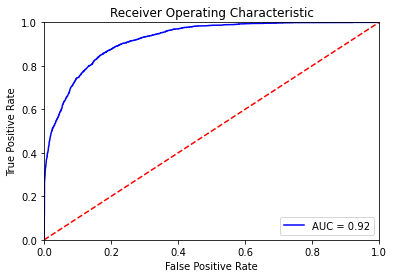

In [79]:
X=pd.get_dummies(binning.drop('income',1),drop_first=True)
y=binning.income
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=90)
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
probs = gbc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()